BIG MARKET SALES PREDICTION



In [21]:
#import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')


In [22]:
#load the dataset
market = pd.read_csv('bigmarket.csv')
market.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [23]:
#Get the basic information on the dataset
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [24]:
market.shape

(8523, 12)

In [25]:
#Get basic description of the numerical features in the dataset
market.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
#get the na values
market.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
#perform eda

#find the type of outlets and their number
market['Outlet_Type'].value_counts()


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

Text(0.5, 1.0, 'Bargraph for the sales as per the outlet type')

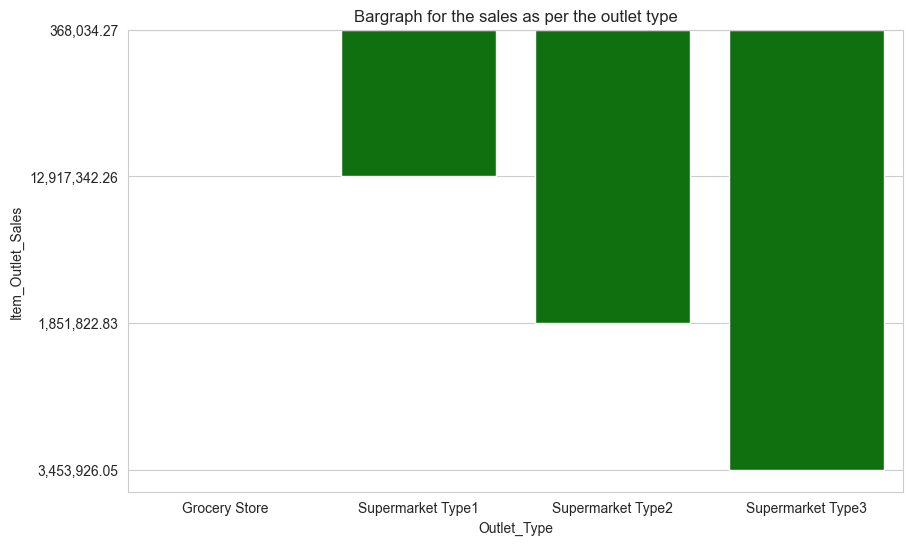

In [28]:
#plot a bargraph for the sales as per the outlet type
y = market.groupby(by='Outlet_Type')['Item_Outlet_Sales'].sum().apply(lambda x: f"{x:,.2f}")
x= market['Outlet_Type']

plt.figure(figsize=(10,6))
sns.barplot(data=y,color='green')
plt.title('Bargraph for the sales as per the outlet type')




In [29]:
#what is the most sold products
market['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [30]:
#what are the items that are bringing more sales
market.groupby(by='Item_Type')['Item_Outlet_Sales'].sum().apply(lambda x: f"{x:,.2f}")


Item_Type
Baking Goods             1,265,525.34
Breads                     553,237.19
Breakfast                  232,298.95
Canned                   1,444,151.49
Dairy                    1,522,594.05
Frozen Foods             1,825,734.79
Fruits and Vegetables    2,820,059.82
Hard Drinks                457,793.43
Health and Hygiene       1,045,200.14
Household                2,055,493.71
Meat                       917,565.61
Others                     325,517.61
Seafood                    148,868.22
Snack Foods              2,732,786.09
Soft Drinks                892,897.72
Starchy Foods              351,401.25
Name: Item_Outlet_Sales, dtype: object

<Figure size 800x500 with 0 Axes>

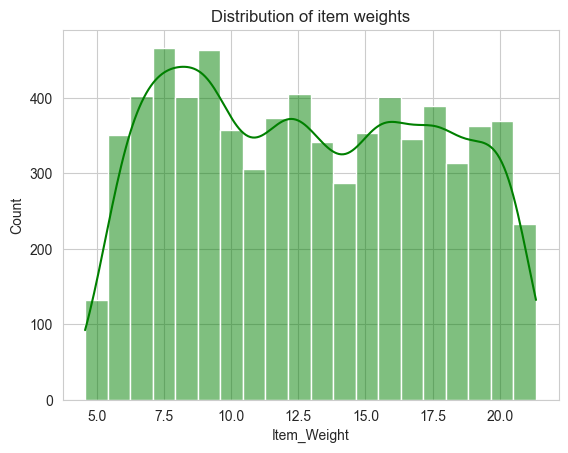

<Figure size 800x500 with 0 Axes>

In [31]:
#The distribution of weight items
plt.title('Distribution of item weights')
sns.histplot(data=market['Item_Weight'],kde=True,color='green')
plt.figure(figsize=(8,5))


Text(0.5, 1.0, 'Visibilty of items distriibuted')

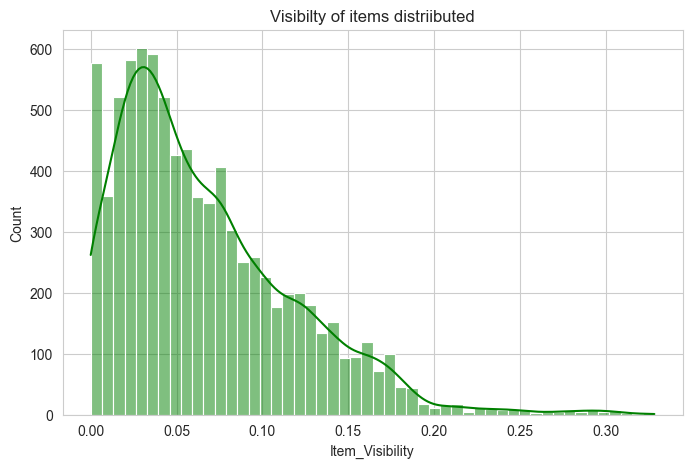

In [32]:
#The distribution of item visibility
plt.figure(figsize=(8,5))
sns.histplot(data=market['Item_Visibility'],kde=True,color='green')

plt.title('Visibilty of items distriibuted')

Data pre_processing

In [33]:
#use the label encoder to change the categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

market.head()
market['Outlet_Size'].fillna(market['Outlet_Size'].mode()[0],inplace=True)
market['Item_Weight'].fillna(market['Item_Weight'].mean(),inplace=True)

market.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
market.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
cat_cols = [col for col in market.columns if market[col].dtype == 'object']
print(cat_cols)


encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encoded_cat = encoder.fit_transform(market[cat_cols])

encoded_df = pd.DataFrame(encoded_cat,columns=encoder.get_feature_names_out(cat_cols))

market = market.drop(columns=cat_cols).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
market = pd.concat([market,encoded_df],axis=1)

market.head(10)


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0.016047,249.8092,1999,3735.1380,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920000,0.019278,48.2692,2009,443.4228,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.500000,0.016760,141.6180,1999,2097.2700,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200000,0.000000,182.0950,1998,732.3800,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.930000,0.000000,53.8614,1987,994.7052,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,10.395000,0.000000,51.4008,2009,556.6088,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,13.650000,0.012741,57.6588,1987,343.5528,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,12.857645,0.127470,107.7622,1985,4022.7636,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,16.200000,0.016687,96.9726,2002,1076.5986,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,19.200000,0.094450,187.8214,2007,4710.5350,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [37]:
from sklearn.model_selection import train_test_split

features = market.drop('Item_Outlet_Sales',axis=1)
target  = market['Item_Outlet_Sales']

features = StandardScaler().fit_transform(features)

x_train,x_test,y_train,y_test = train_test_split(features,target,random_state=20,test_size=0.2)

for _ in x_train,x_test,y_train,y_test:
    print(_.shape)

(6818, 1604)
(1705, 1604)
(6818,)
(1705,)


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model = Sequential([
    Dense(1024, activation='relu', input_shape=(x_train.shape[1],)),  
    BatchNormalization(),
    Dropout(0.3),  # Dropout is correctly placed after activation

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='linear')  # Output layer for regression
])

model.compile(optimizer='Adam',loss=tf.keras.losses.LogCosh(),metrics=['mae'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 1024)           │     1,643,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,348,801 (8.96 MB)

 Trainable params: 2,344,833 (8.94 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [53]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100,)

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - loss: 2177.1687 - mae: 2177.8621 - val_loss: 2126.9617 - val_mae: 2127.6550
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 2201.6074 - mae: 2202.3013 - val_loss: 2108.4517 - val_mae: 2109.1443
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 2164.4485 - mae: 2165.1418 - val_loss: 2073.8210 - val_mae: 2074.5142
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 2137.9780 - mae: 2138.6719 - val_loss: 2029.0155 - val_mae: 2029.7090
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 2060.9458 - mae: 2061.6389 - val_loss: 1973.7152 - val_mae: 1974.4088
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 1983.0367 - mae: 1983.7291 - val_loss: 1902.9023 - val_mae: 1903.5953
Epoch 7/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 1941.8705 - mae: 1942.5630 - val_loss: 1820.6718 - val_mae: 1821.3645
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 1855.7

In [56]:
test_loss,test_mae = model.evaluate(x_test,y_test)

print(f"Test loss: {test_loss:.4f}, Test Mae: {test_mae:.4f}")

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 899.7021 - mae: 900.3929
Test loss: 897.4432, Test Mae: 898.1349
